# Analyse population Humaine

In [1]:
#import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
import numpy as np
from tools import calPopRegions, continentTaux, continentTauxAll

In [2]:
# Load dataset
df = pd.read_csv('Data/PopulationByAgeSex.csv', index_col="Time", parse_dates=True)
print(df.shape)
print(df['PopMale_0_4'].sum())
df

(66893, 70)
1904302820.743


,Id,LocID,Location,PopMale_0_4,PopFemale_0_4,PopTotal_0_4,PopMale_5_9,PopFemale_5_9,PopTotal_5_9,PopMale_10_14,...,PopMale_95_99,PopFemale_95_99,PopTotal_95_99,PopMale_100Plus,PopFemale_100Plus,PopTotal_100Plus,PopMale,PopFemale,PopTotal,YearDataCompleted
Time,,,,,,,,,,,,,,,,,,,,,
1950-01-01,1,4,Afghanistan,630.044,661.578,1291.622,516.206,487.335,1003.541,461.378,...,0.004,0.003,0.007,0.000,0.000,0.000,4099.243,3652.874,7752.117,1
1951-01-01,2,4,Afghanistan,641.199,673.293,1314.492,525.302,502.402,1027.704,465.611,...,0.007,0.005,0.012,0.000,0.000,0.000,4134.756,3705.395,7840.151,1
1952-01-01,3,4,Afghanistan,650.825,669.274,1320.099,533.097,521.672,1054.769,471.928,...,0.012,0.009,0.021,0.000,0.000,0.000,4174.450,3761.546,7935.996,1
1953-01-01,4,4,Afghanistan,659.896,663.606,1323.502,538.351,541.216,1079.567,480.448,...,0.015,0.013,0.028,0.000,0.000,0.000,4218.336,3821.348,8039.684,1
1954-01-01,5,4,Afghanistan,670.694,663.295,1333.989,540.820,557.196,1098.016,489.780,...,0.014,0.011,0.025,0.000,0.000,0.000,4266.484,3884.832,8151.316,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2096-01-01,66889,716,Zimbabwe,953.505,939.918,1893.423,968.045,956.123,1924.168,992.221,...,3.108,11.248,14.356,0.142,0.883,1.025,15008.463,15932.316,30940.779,1
2097-01-01,66890,716,Zimbabwe,950.059,936.463,1886.522,963.764,951.798,1915.562,986.112,...,4.189,13.881,18.070,0.154,0.947,1.101,15008.822,15943.386,30952.208,1
2098-01-01,66891,716,Zimbabwe,946.047,932.455,1878.502,959.864,947.789,1907.653,980.369,...,5.003,15.945,20.948,0.169,1.022,1.191,15007.570,15952.241,30959.811,1


In [3]:
# see the id location
locID = df['LocID'].unique()
print(f'le shape des LocD: {locID.shape}')
print(locID)

le shape des LocD: (443,)
[   4  903 1823 1560 2080 2081 2082 2083 2084 1200    8   12 1533   24
   28   32   51  533  935 1207 1824 1557   36  927   40   31 1525 1526
   44   48   50   52  112   56   84 2067 2068 2069 2070 2071 2072  204
   64 1527 1569   68   70   72   76   96  100  854  108  132  116  120
  124  915 1530  140  916 5500 1545  921  148  830  152  156 1105  344
  446  158  170 1566 2074 2075 2076 2077 2078 2079  174  178  188 1638
 2094 2095 2096 2097 2098 2099  191  192  531  196  203  384  408  180
  208 1106  262  214 1737 1736 1744 1746 1071 1074 1075 1073 1072 2061
 2058 2059 2060 1054 1057 1055 2049 1060 1059 1058 1056 2048 2045 2046
 2047 2044 2053 1064 2054 2050 1062 2051 2055 1065 2052 2056 2062 2066
 2065 2063 2064 1765 1563  910  906  923 1825 1832 1538 1540 1547  218
  818  222  226  232  233  748  231 1546  908  917 1506 1829 1550 1544
 1549  986  242  246  250 1107  254  258  266  270  268  276  288 1536
  300  308 1556 1523 1522 1524  312  316  320  324 

In [4]:
#see all location
location = df['Location'].unique()
print(f'le noms des nation et organisation: {location.shape}')
print(location)

le noms des nation et organisation: (440,)
['Afghanistan' 'Africa' 'African Group' 'African Union'
 'African Union: Central Africa' 'African Union: Eastern Africa'
 'African Union: Northern Africa' 'African Union: Southern Africa'
 'African Union: Western Africa'
 'African; Caribbean and Pacific (ACP) Group of States' 'Albania'
 'Algeria' 'Andean Community' 'Angola' 'Antigua and Barbuda' 'Argentina'
 'Armenia' 'Aruba' 'Asia' 'Asia-Pacific Economic Cooperation (APEC)'
 'Asia-Pacific Group' 'Association of Southeast Asian Nations (ASEAN)'
 'Australia' 'Australia/New Zealand' 'Austria' 'Azerbaijan' 'BRIC' 'BRICS'
 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize'
 'Belt-Road Initiative (BRI)' 'Belt-Road Initiative: Africa'
 'Belt-Road Initiative: Asia' 'Belt-Road Initiative: Europe'
 'Belt-Road Initiative: Latin America and the Caribbean'
 'Belt-Road Initiative: Pacific' 'Benin' 'Bhutan'
 'Black Sea Economic Cooperation (BSEC)'
 'Bolivarian Alliance for the Americas

In [5]:
# number of location total
print(f"Le nombre de nations: {len(location)}")

Le nombre de nations: 440


# Etudes de la population mondiale

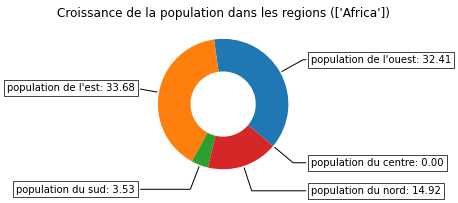

In [6]:
#comparaisiond de la croissance de la population dans differentes regions de
# l'afrique
name = df[df['LocID']==903]['Location'].unique()
afric = df[df['Location']=='Africa']['PopTotal'].sum(axis=0)
africCentral = df[df['Location']=='Central Africa']['PopTotal'].sum(axis=0)
africEst = df[df['Location']=='Eastern Africa']['PopTotal'].sum(axis=0)
africSud = df[df['Location']=='Southern Africa']['PopTotal'].sum(axis=0)
africNord = df[df['Location']=='Northern Africa']['PopTotal'].sum(axis=0)
africOuest = df[df['Location']=='Western Africa']['PopTotal'].sum(axis=0)
calPopRegions(africOuest, africEst, africSud, africNord, africCentral, afric, name )

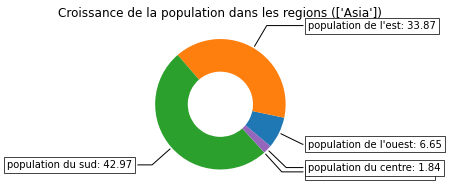

In [7]:
#comparaisiond de la croissance de la population dans differentes regions de
# l'asie
name = df[df['LocID']==935]['Location'].unique()
asia = df[df['Location']=='Asia']['PopTotal'].sum(axis=0)
asiaCentral = df[df['Location']=='Central Asia']['PopTotal'].sum(axis=0)
asiaEst = df[df['Location']=='Eastern Asia']['PopTotal'].sum(axis=0)
asiaSud = df[df['Location']=='Southern Asia']['PopTotal'].sum(axis=0)
asiaNord = df[df['Location']=='Northern Asia']['PopTotal'].sum(axis=0)
asiaOuest = df[df['Location']=='Western Asia']['PopTotal'].sum(axis=0)
calPopRegions(asiaOuest, asiaEst, asiaSud, asiaNord, asiaCentral, asia, name )

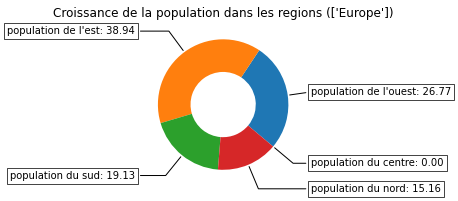

In [8]:
#comparaisiond de la croissance de la population dans differentes regions de
# l'europe
name = df[df['LocID']==917]['Location'].unique()
europe = df[df['LocID']==917]['PopTotal'].sum(axis=0)
europeCentral = df[df['Location']=='Central Europe']['PopTotal'].sum(axis=0)
europeEst = df[df['Location']=='Eastern Europe']['PopTotal'].sum(axis=0)
europeSud = df[df['Location']=='Southern Europe']['PopTotal'].sum(axis=0)
europeSud = df[df['Location']=='Southern Europe']['PopTotal'].sum(axis=0)
europeNord = df[df['Location']=='Northern Europe']['PopTotal'].sum(axis=0)
europeOuest = df[df['Location']=='Western Europe']['PopTotal'].sum(axis=0)
calPopRegions(europeOuest, europeEst, europeSud, europeNord, europeCentral, europe, name )

In [9]:
#comparaisiond de la croissance de la population dans differentes regions de
# l'amerique
"""
america = df[df['Location']=='America']['PopTotal'].sum()
americaCentral = df[df['Location']=='Central America']['PopTotal'].sum()
americaEst = df[df['Location']=='Eastern America']['PopTotal'].sum()
americaSud = df[df['Location']=='Southern America']['PopTotal'].sum()
americaNord = df[df['Location']=='Northern America']['PopTotal'].sum()
americaOuest = df[df['Location']=='Western America']['PopTotal'].sum()
calPopRegions(americaOuest,americaEst, americaSud, americaNord, americaCentral, america )
"""

"\namerica = df[df['Location']=='America']['PopTotal'].sum()\namericaCentral = df[df['Location']=='Central America']['PopTotal'].sum()\namericaEst = df[df['Location']=='Eastern America']['PopTotal'].sum()\namericaSud = df[df['Location']=='Southern America']['PopTotal'].sum()\namericaNord = df[df['Location']=='Northern America']['PopTotal'].sum()\namericaOuest = df[df['Location']=='Western America']['PopTotal'].sum()\ncalPopRegions(americaOuest,americaEst, americaSud, americaNord, americaCentral, america )\n"

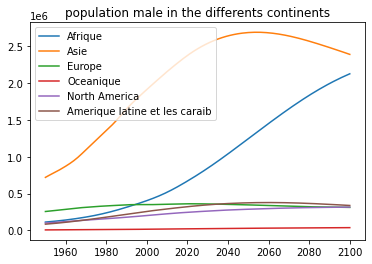

In [10]:
#comparaison entre les populations Male des differents continents
afric = df[df['LocID']==903]['PopMale']
asia = df[df['LocID']==935]['PopMale']
europe = df[df['LocID']==917]['PopMale']
oceania = df[df['LocID']==909]['PopMale']
nafta = df[df['LocID']==1520]['PopMale']
latinCaribbean = df[df['LocID']==904]['PopMale']

#graph
plt.plot(afric, label="Afrique")
plt.plot(asia, label="Asie")
plt.plot(europe, label='Europe')
plt.plot(oceania, label="Oceanique")
plt.plot(nafta, label= "North America")
plt.plot(latinCaribbean, label="Amerique latine et les caraib")
plt.title("population male in the differents continents")
plt.legend()
plt.show()

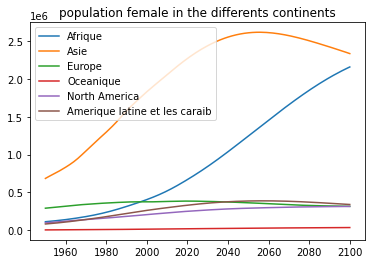

In [11]:
#comparaison entre les populations Female des differents continents
afric = df[df['LocID']==903]['PopFemale']
asia = df[df['LocID']==935]['PopFemale']
europe = df[df['LocID']==917]['PopFemale']
oceania = df[df['LocID']==909]['PopFemale']
nafta = df[df['LocID']==1520]['PopFemale']
latinCaribbean = df[df['LocID']==904]['PopFemale']

#graph
plt.plot(afric, label="Afrique")
plt.plot(asia, label="Asie")
plt.plot(europe, label='Europe')
plt.plot(oceania, label="Oceanique")
plt.plot(nafta, label= "North America")
plt.plot(latinCaribbean, label="Amerique latine et les caraib")
plt.title("population female in the differents continents")
plt.legend()
plt.show()

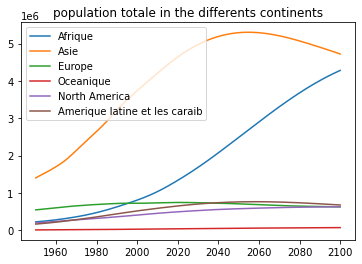

In [12]:
#comparaison entre les populations totale des differents continents
afric = df[df['LocID']==903]['PopTotal']
asia = df[df['LocID']==935]['PopTotal']
europe = df[df['LocID']==917]['PopTotal']
oceania = df[df['LocID']==909]['PopTotal']
nafta = df[df['LocID']==1520]['PopTotal']
latinCaribbean = df[df['LocID']==904]['PopTotal']

#graph
plt.plot(afric, label="Afrique")
plt.plot(asia, label="Asie")
plt.plot(europe, label='Europe')
plt.plot(oceania, label="Oceanique")
plt.plot(nafta, label= "North America")
plt.plot(latinCaribbean, label="Amerique latine et les caraib")
plt.title("population totale in the differents continents")
plt.legend()
plt.show()

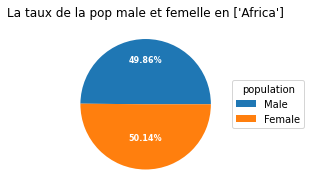

In [13]:
#calcul de taux pour le continent en afrique
#Pour les males
popM  = df[df['LocID']==903]['PopMale'].sum(axis=0)
#Pour les femeles
popF = df[df['LocID']==903]['PopFemale'].sum(axis=0)
#en totale
popT = df[df['LocID']==903]['PopTotal'].sum(axis=0)
#name continent
name = df[df['LocID']==903]['Location'].unique()
#using function
continentTaux(popM, popF, popT, name)

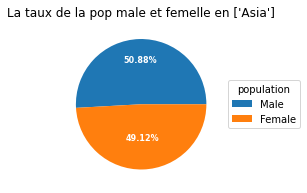

In [14]:
#calcul de taux pour le continent en asie 
#Pour les males
popM  = df[df['LocID']==935]['PopMale'].sum(axis=0)
#Pour les femeles
popF = df[df['LocID']==935]['PopFemale'].sum(axis=0)
#en totale
popT = df[df['LocID']==935]['PopTotal'].sum(axis=0)
#name continent
name = df[df['LocID']==935]['Location'].unique()
#using function
continentTaux(popM, popF, popT, name)

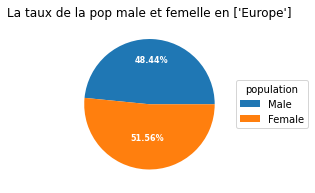

In [15]:
#calcul de taux pour le continent en europe
#Pour les males
popM  = df[df['LocID']==917]['PopMale'].sum(axis=0)
#Pour les femeles
popF = df[df['LocID']==917]['PopFemale'].sum(axis=0)
#en totale
popT = df[df['LocID']==917]['PopTotal'].sum(axis=0)
#name continent
name = df[df['LocID']==917]['Location'].unique()
#using function
continentTaux(popM, popF, popT, name)

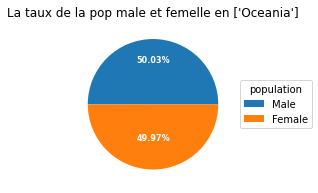

In [16]:
#calcul de taux pour le continent en oceanique
#Pour les males
popM  = df[df['LocID']==909]['PopMale'].sum(axis=0)
#Pour les femeles
popF = df[df['LocID']==909]['PopFemale'].sum(axis=0)
#en totale
popT = df[df['LocID']==909]['PopTotal'].sum(axis=0)
#name continent
name = df[df['LocID']==909]['Location'].unique()
#using function
continentTaux(popM, popF, popT, name)

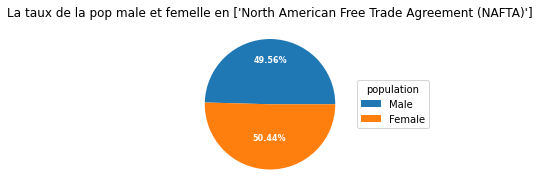

In [17]:
#calcul de taux pour le continent en amerque du nord 
#Pour les males
popM  = df[df['LocID']==1520]['PopMale'].sum(axis=0)
#Pour les femeles
popF = df[df['LocID']==1520]['PopFemale'].sum(axis=0)
#en totale
popT = df[df['LocID']==1520]['PopTotal'].sum(axis=0)
#name continent
name = df[df['LocID']==1520]['Location'].unique()
#using function
continentTaux(popM, popF, popT, name)

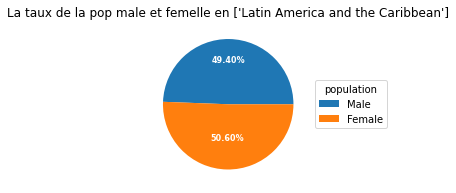

In [18]:
#calcul de taux pour le continent en asie 
#Pour les males
popM  = df[df['LocID']==904]['PopMale'].sum(axis=0)
#Pour les femeles
popF = df[df['LocID']==904]['PopFemale'].sum(axis=0)
#en totale
popT = df[df['LocID']==904]['PopTotal'].sum(axis=0)
#name continent
name = df[df['LocID']==904]['Location'].unique()
#using function
continentTaux(popM, popF, popT, name)

ValueError: Wedge sizes 'x' must be non negative values

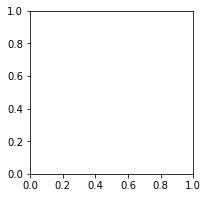

In [19]:
"""popTotale= df['PopTotal'].sum(axis=0)
afric = df[df['LocID']==903]['PopTotal'].sum(axis=0)
asia = df[df['LocID']==935]['PopTotal'].sum(axis=0)
europe = df[df['LocID']==917]['PopTotal'].sum(axis=0)
oceania = df[df['LocID']==909]['PopTotal'].sum(axis=0)
nafta = df[df['LocID']==1520]['PopTotal'].sum(axis=0)
latinCaribbean = df[df['LocID']==904]['PopTotal'].sum(axis=0)

continentTauxAll(afric, asia, europe, oceania, nafta, latinCaribbean, popTotale)

"""